In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("/home/azureuser/cloudfiles/code/Users/Akshayanivashini.ChandrasekarVijayalakshmi/Skinly_Thailand/Akshay_projects2/updated_thai_chunkid.csv")

# Remove outliers based on the given filters for all users
cleaned_data = data[(data['moisture_cheek'] <= 95) & (data['moisture_forehead'] <= 95) & (data['moisture_forearm'] <= 95) & (data['shininess_forehead'] <= 95) & (data['vessels_den_forehead'] <= 1000) & (data['skin_texture_cheek'] <= 95) & (data['skin_texture_forehead'] <= 95) & (data['skin_texture_forearm'] <= 95)]

# Print cleaned data
print(cleaned_data)

# Save cleaned data as a custom outlier CSV file
cleaned_data.to_csv("custom_outlier.csv")
# Print confirmation message
print("Custom outlier CSV file saved successfully!")


       user_id        date chunkiduser  moisture_cheek  moisture_forearm  \
0         3154  2023-01-19      chunk1            10.0              40.0   
1         3154  2023-01-20      chunk1            22.0              42.0   
2         3154  2023-01-21      chunk1            16.0              36.0   
3         3154  2023-01-22      chunk1            18.0              45.0   
4         3154  2023-01-23      chunk1            19.0              47.0   
...        ...         ...         ...             ...               ...   
34902    21590  2024-03-14      chunk1            32.0              49.0   
34903    21590  2024-03-15      chunk1            40.0              46.0   
34904    21590  2024-03-16      chunk1            43.0              53.0   
34905    21590  2024-03-17      chunk1            41.0              51.0   
34906    21590  2024-03-18      chunk1            35.0              52.0   

       moisture_forehead  shininess_cheek  shininess_forehead  evenness_cheek  \
0     

In [12]:
custom=pd.read_csv("/home/azureuser/cloudfiles/code/Users/Akshayanivashini.ChandrasekarVijayalakshmi/Skinly_Thailand/Akshay_projects2/outlier_and_normalisation/custom_outlier.csv")
custom2=pd.read_csv("/home/azureuser/cloudfiles/code/Users/Akshayanivashini.ChandrasekarVijayalakshmi/Skinly_Thailand/Akshay_projects2/outlier_and_normalisation/custom2.csv")

In [6]:
import matplotlib.pyplot as plt

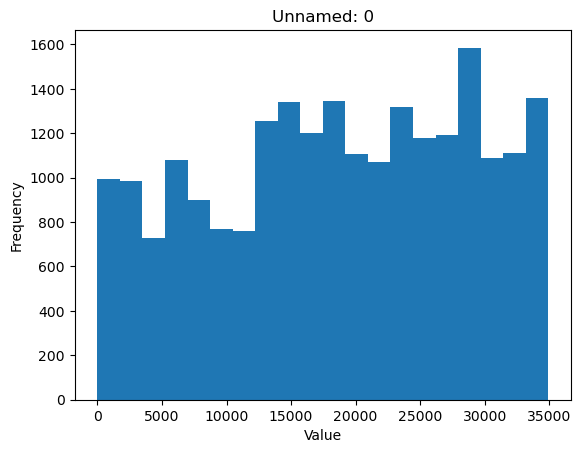

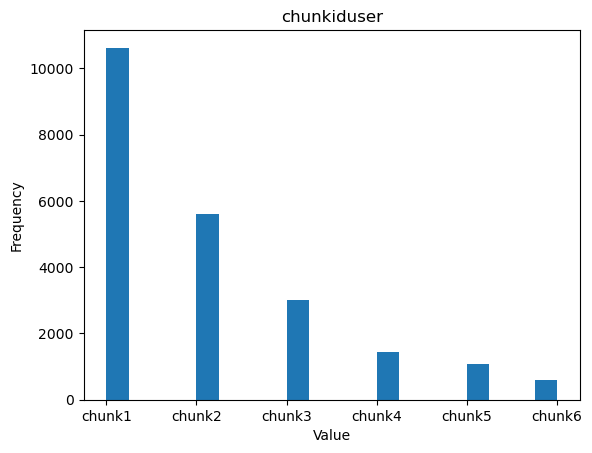

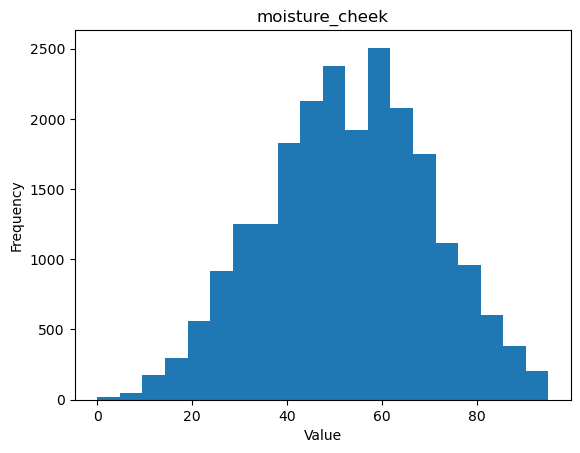

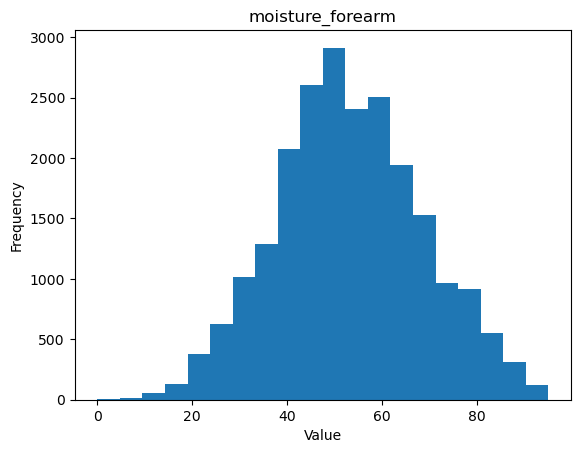

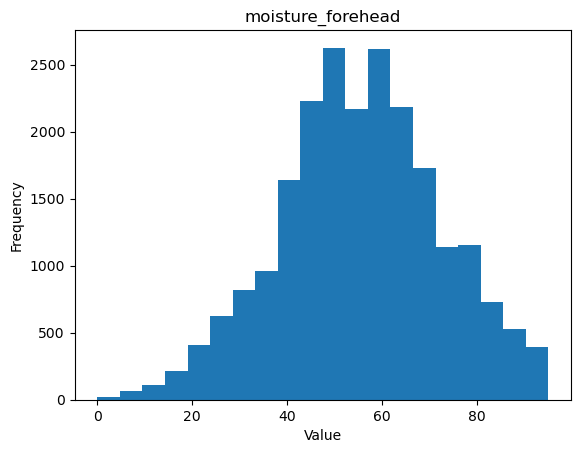

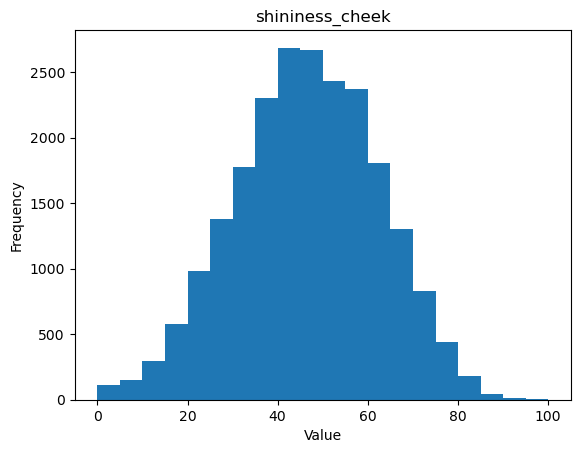

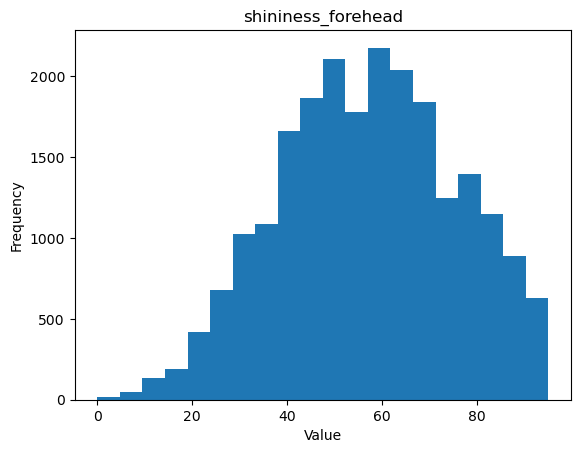

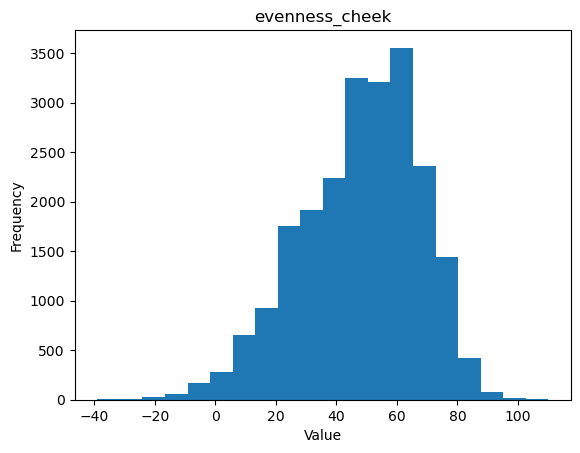

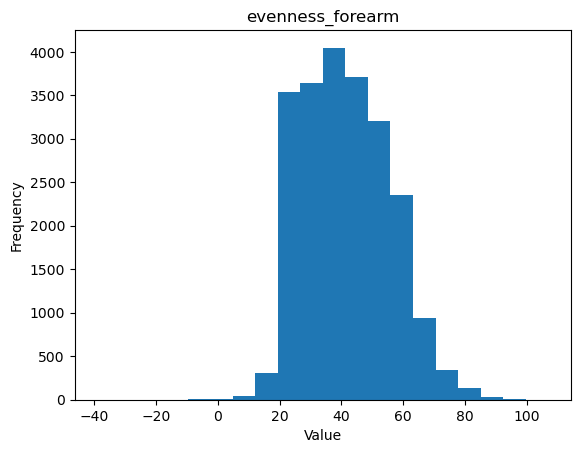

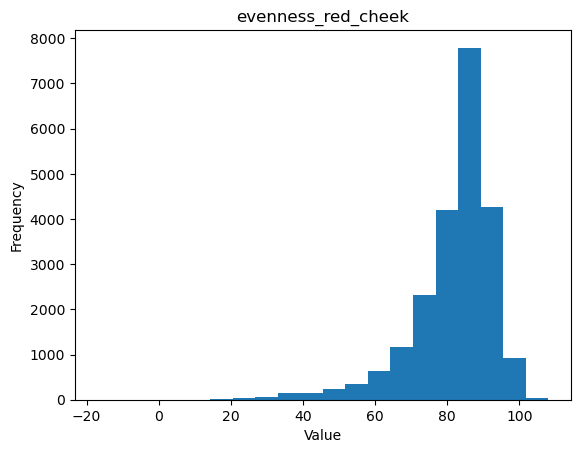

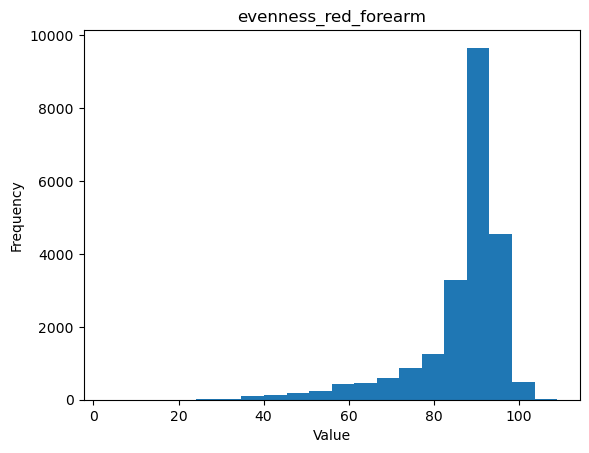

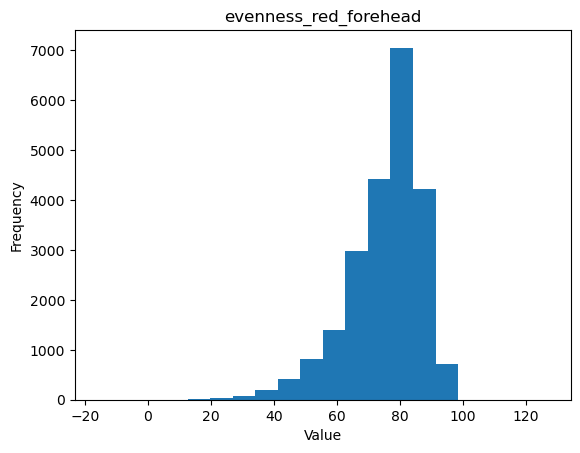

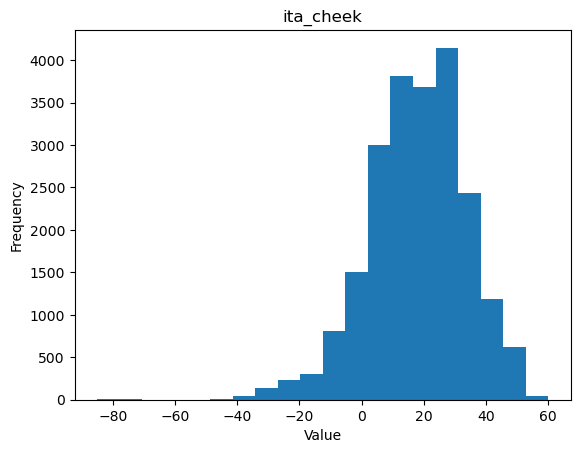

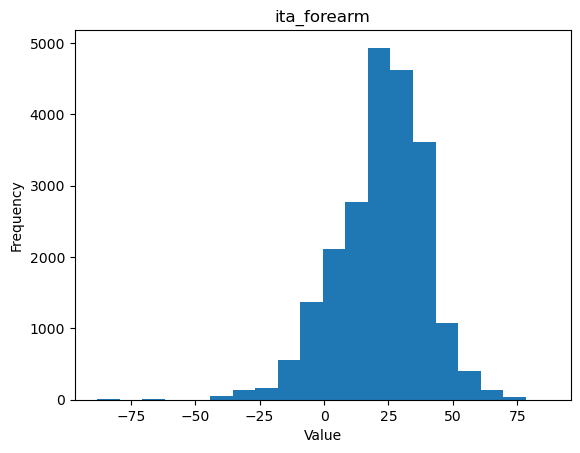

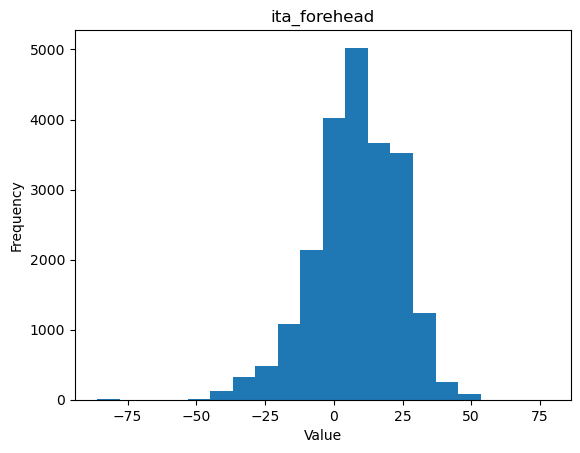

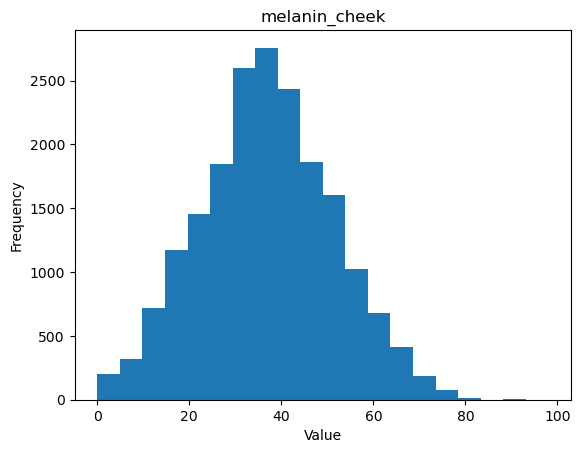

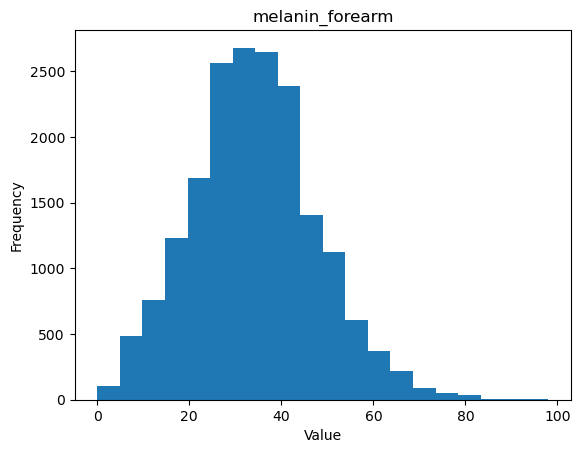

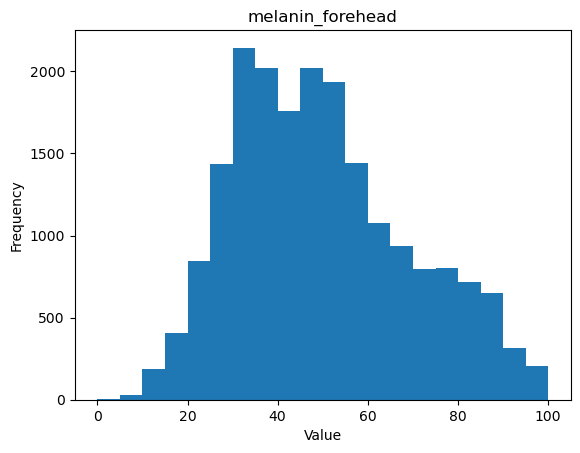

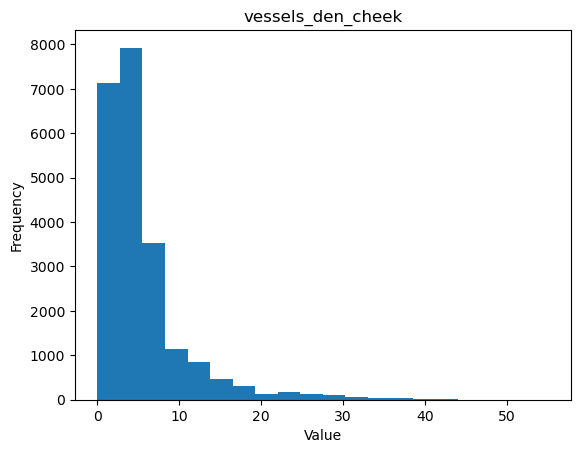

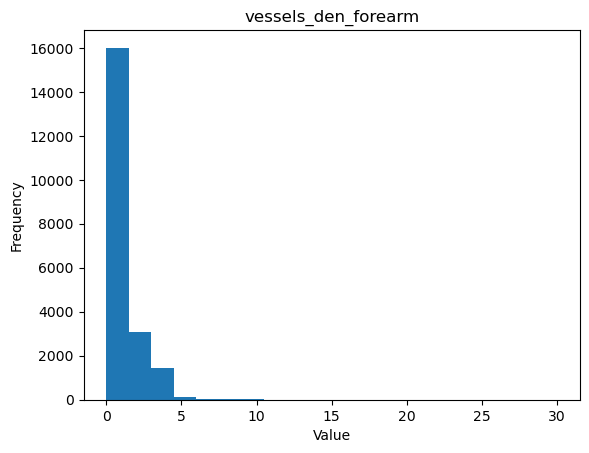

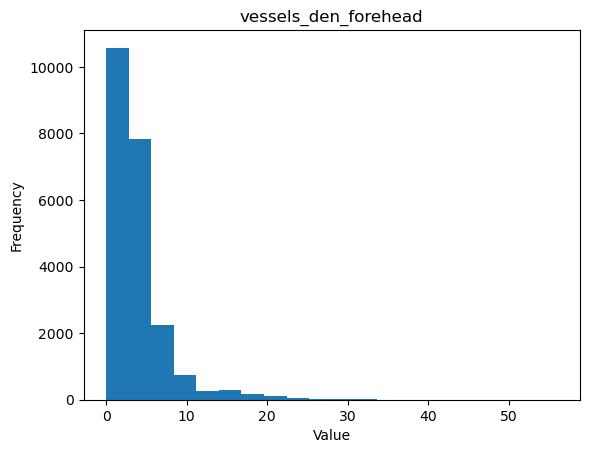

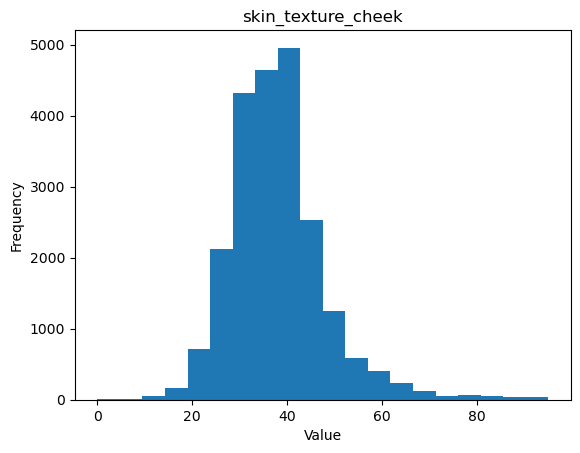

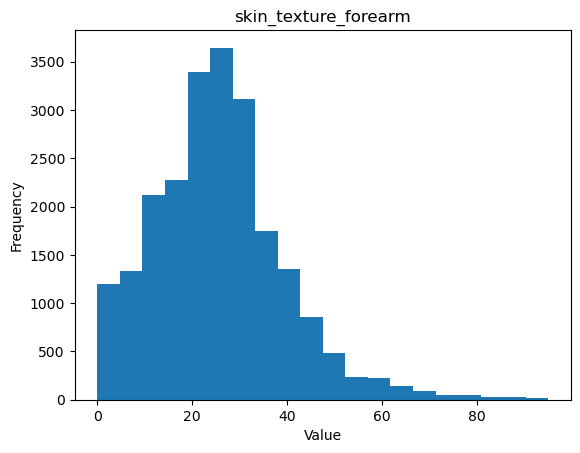

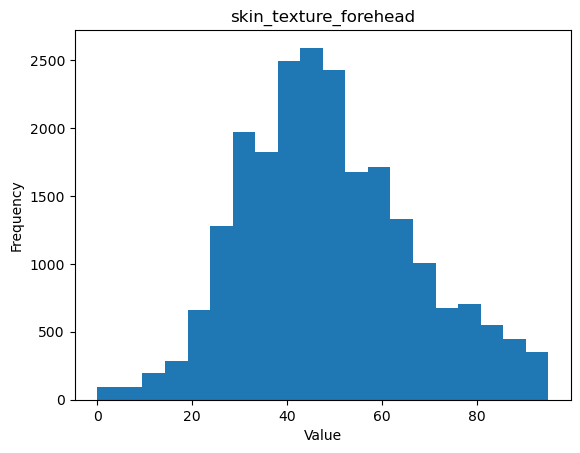

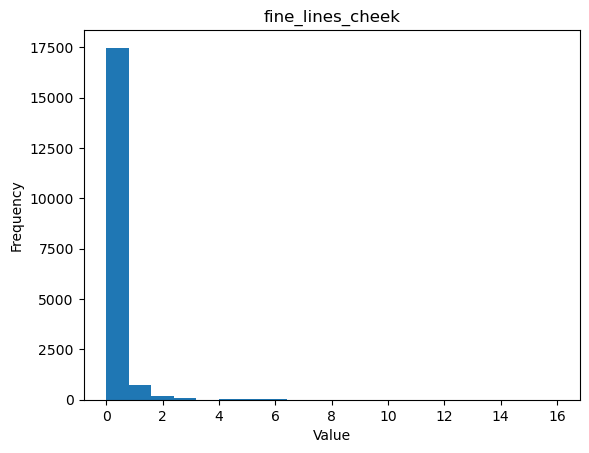

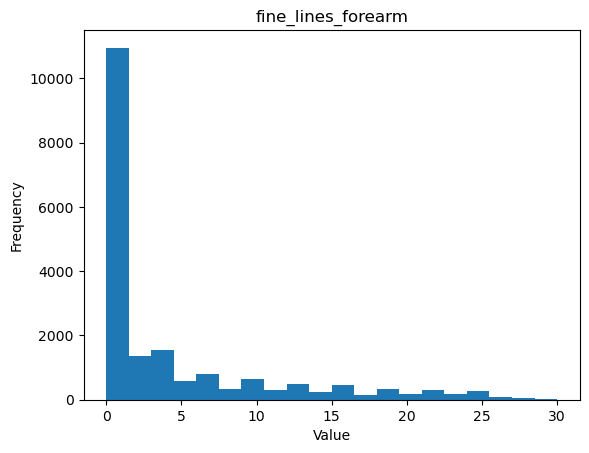

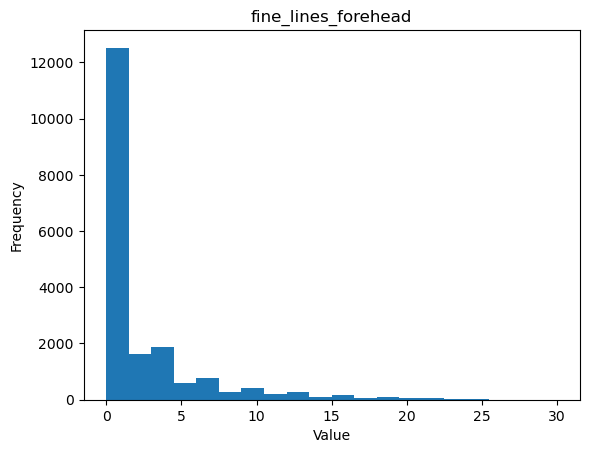

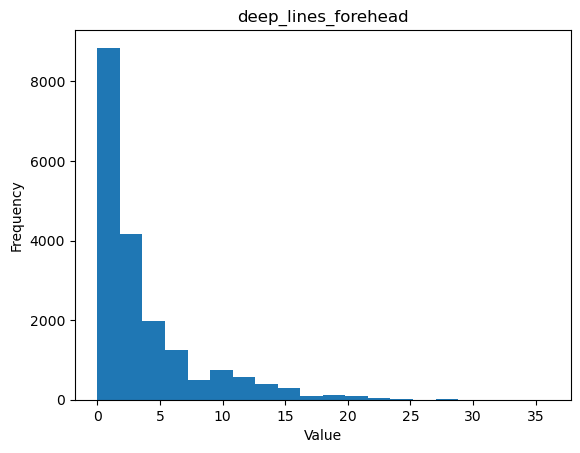

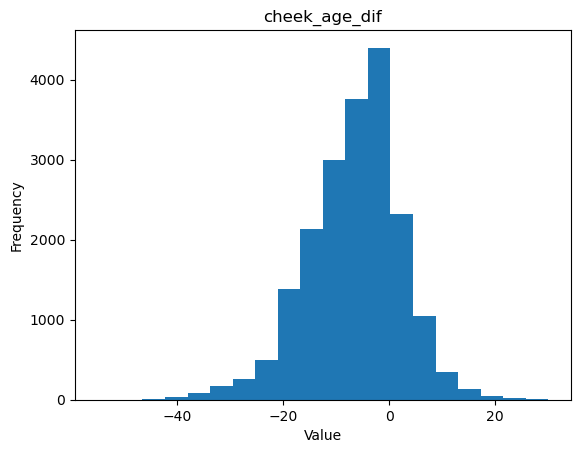

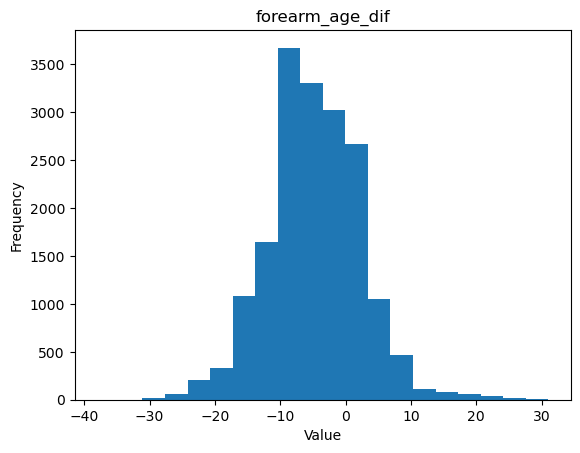

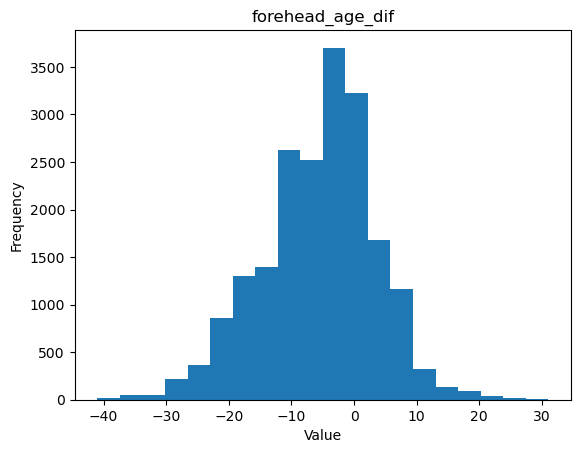

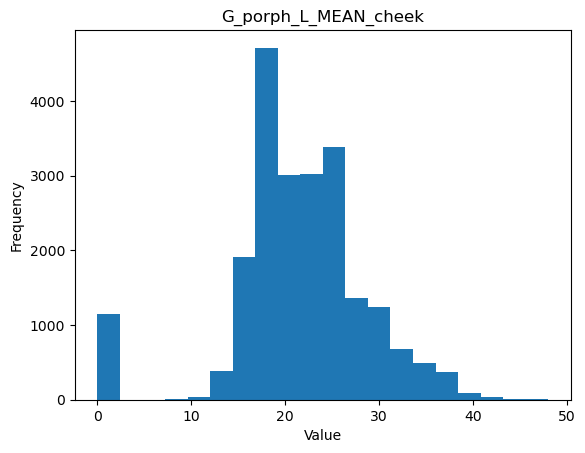

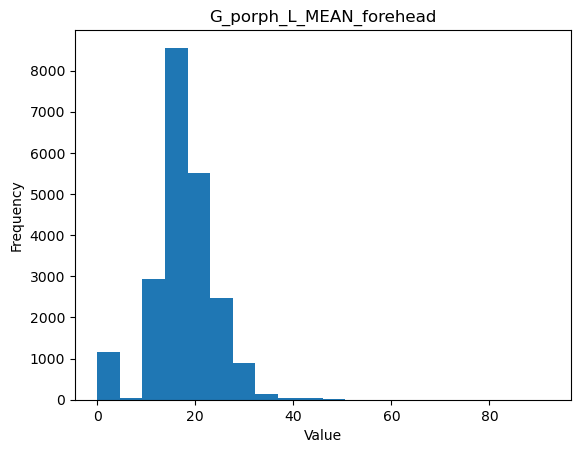

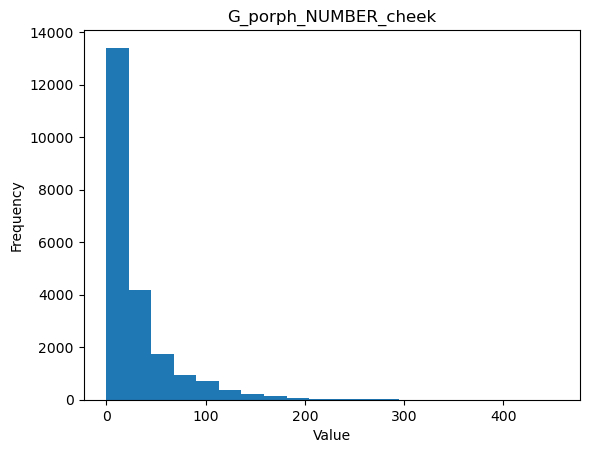

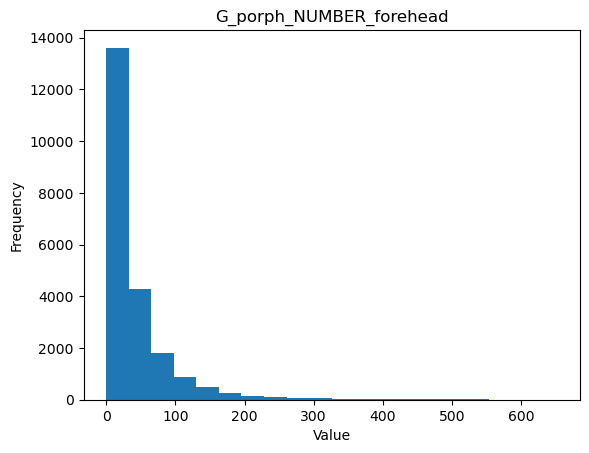

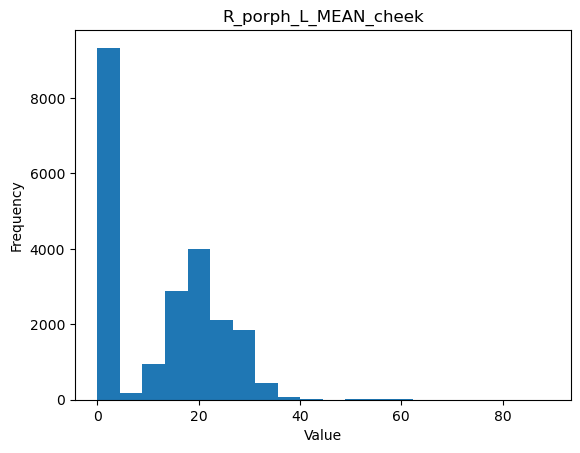

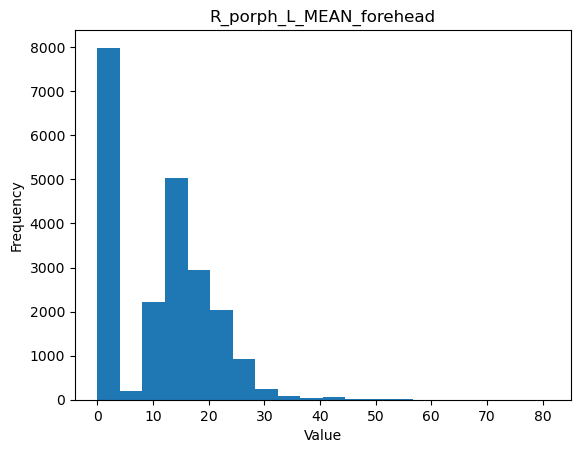

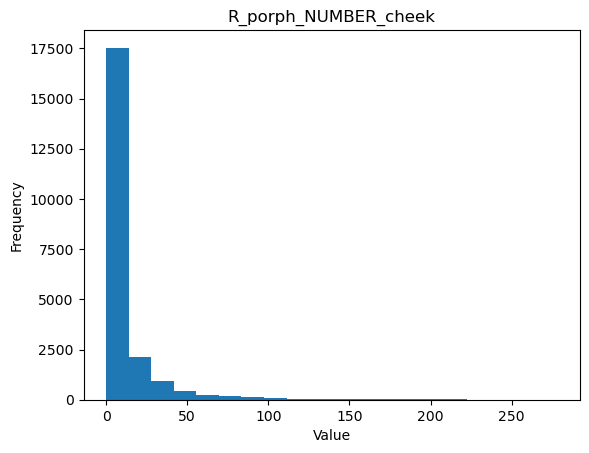

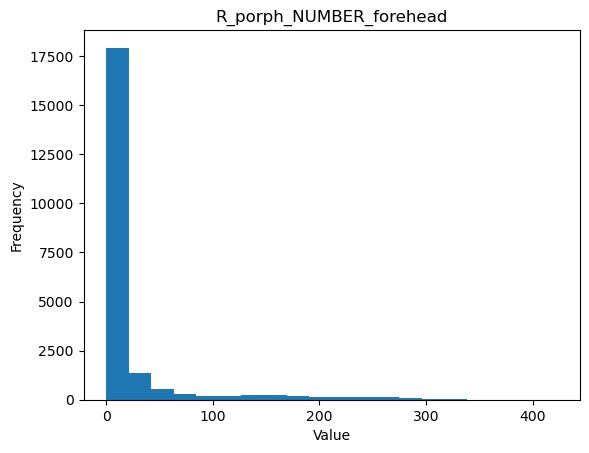

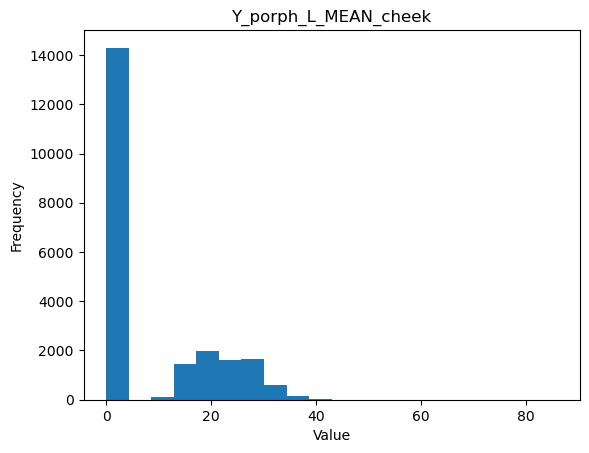

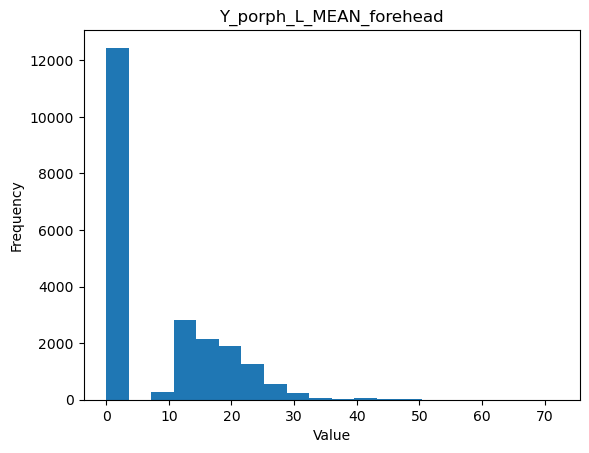

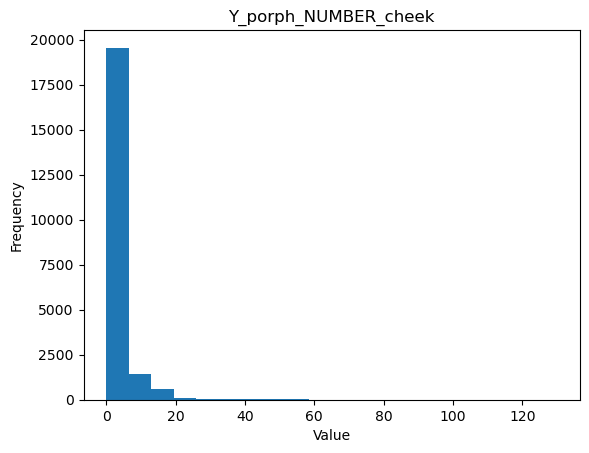

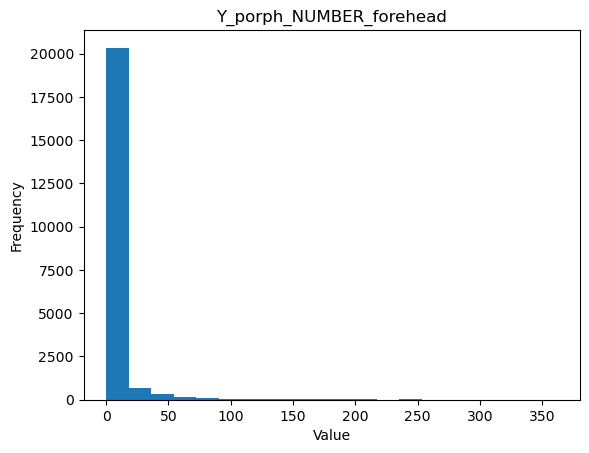

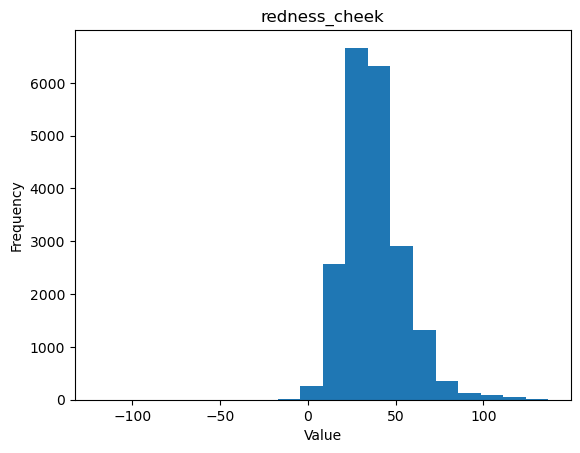

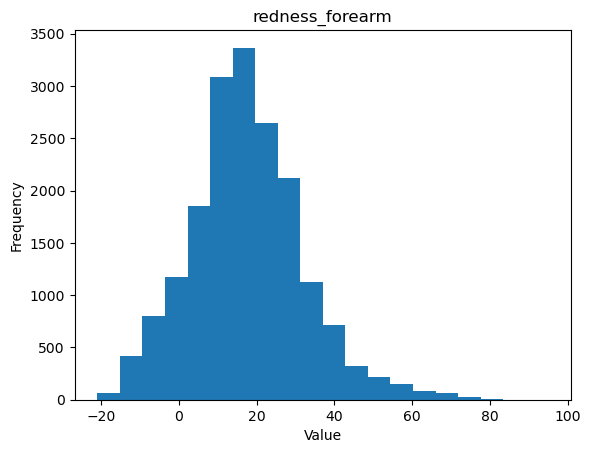

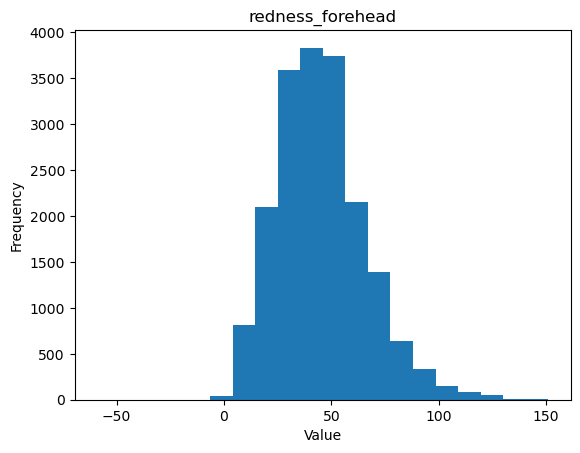

In [8]:
# Loop through each column in the dataset and create a distribution plot
for col in custom.columns:
    if col != 'user_id' and col != 'date' and col != 'chunkid':
        plt.figure()
        plt.hist(custom[col], bins=20)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

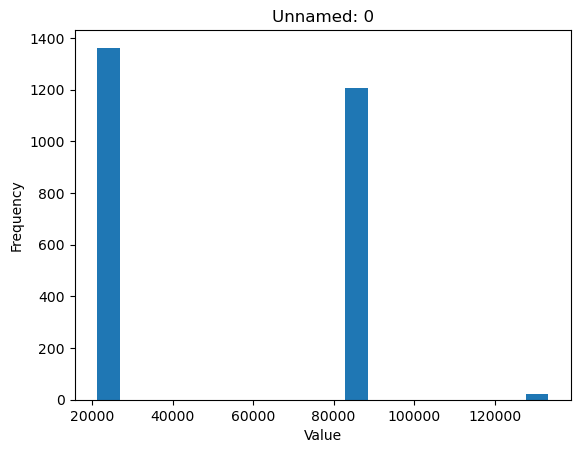

TypeError: 'value' must be an instance of str or bytes, not a float

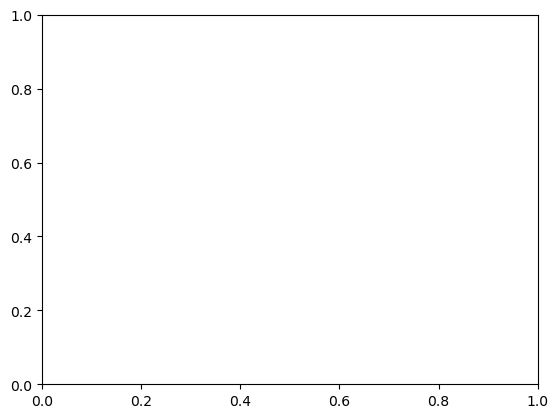

In [13]:
# Loop through each column in the dataset and create a distribution plot
for col in custom2.columns:
    if col != 'user_id' and col != 'date' and col != 'chunkid':
        plt.figure()
        plt.hist(custom2[col], bins=20)
        plt.title(col)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.show()

In [11]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("/home/azureuser/cloudfiles/code/Users/Akshayanivashini.ChandrasekarVijayalakshmi/Skinly_Thailand/Akshay_projects2/thaiuser_chunkid_df.csv")
# Identify outliers based on the given filters for all users
outliers = data[data['vessels_den_forehead'] > 1000]

# Get the user IDs of the outliers
outlier_user_ids = outliers['user_id'].unique()

# Initialize a list to store the cleaned data for all users
cleaned_data = []

# Iterate through each user ID
for user_id in outlier_user_ids:
    # Filter data for the user ID
    user_data = data[data['user_id'] == user_id]
    
    # Identify outliers based on the given filters
    user_outliers = user_data[user_data['vessels_den_forehead'] > 1000]
    
    # Get the dates of the outliers
    outlier_dates = user_outliers['date'].unique()
    
    # Initialize a list to store the dates of the outliers and their corresponding forehead measurements
    outlier_forehead_measurements = []
    
    # Iterate through each outlier date
    for date in outlier_dates:
        # Filter data for the outlier date and forehead measurements
        outlier_data = user_data[(user_data['date'] == date) & (user_data['vessels_den_forehead'] <= 1000)]
        
        # Append the outlier date and forehead measurements to the list
        outlier_forehead_measurements.append(outlier_data)
    
    # Concatenate the outlier forehead measurements into a single dataframe
    outlier_forehead_measurements = pd.concat(outlier_forehead_measurements)
    
    # Remove the outliers and corresponding forehead measurements for the user ID
    user_data = user_data[~user_data['date'].isin(outlier_dates)]
    cleaned_data.append(pd.concat([user_data, outlier_forehead_measurements]))

# Concatenate the cleaned data for all users into a single dataframe
cleaned_data = pd.concat(cleaned_data)

# Save cleaned data as a custom2 CSV file
cleaned_data.to_csv("custom2.csv")
# Print confirmation message
print("Custom2 CSV file saved successfully!")

Custom2 CSV file saved successfully!
